In [1]:
!pip install transformers
!pip install torch
!pip install torchvision
!pip install matplotlib


  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21

In [4]:
import torch
from transformers import ViTFeatureExtractor, ViTForImageClassification
from PIL import Image
import matplotlib.pyplot as plt
from google.colab import files

# Load a pre-trained Vision Transformer model and feature extractor
model_name = "google/vit-base-patch16-224"
feature_extractor = ViTFeatureExtractor.from_pretrained(model_name)
model = ViTForImageClassification.from_pretrained(model_name)


Saving download.jfif to download.jfif


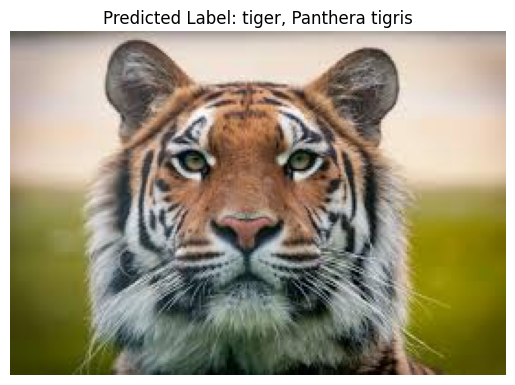

In [11]:
# Function to upload an image
def upload_image():
    uploaded = files.upload()
    for filename in uploaded.keys():
        image = Image.open(filename)
        return image

# Upload your own image
image = upload_image()

# Preprocess the image
inputs = feature_extractor(images=image, return_tensors="pt")

# Run inference
with torch.no_grad():
    outputs = model(**inputs)

# Get the predicted label
logits = outputs.logits
predicted_label = logits.argmax(-1).item()

# Load the labels for the model
labels = model.config.id2label[predicted_label]

# Display the image and the predicted label
plt.imshow(image)
plt.title(f"Predicted Label: {labels}")
plt.axis("off")
plt.show()


In [8]:
!pip install transformers
!pip install torch
!pip install torchvision
!pip install matplotlib


In [9]:
import torch
from transformers import ViTFeatureExtractor, ViTForImageClassification
from PIL import Image
import matplotlib.pyplot as plt
from google.colab import files

# Load a pre-trained Vision Transformer model and feature extractor
model_name = "google/vit-base-patch16-224"
feature_extractor = ViTFeatureExtractor.from_pretrained(model_name)
model = ViTForImageClassification.from_pretrained(model_name)


Saving images.jfif to images (1).jfif


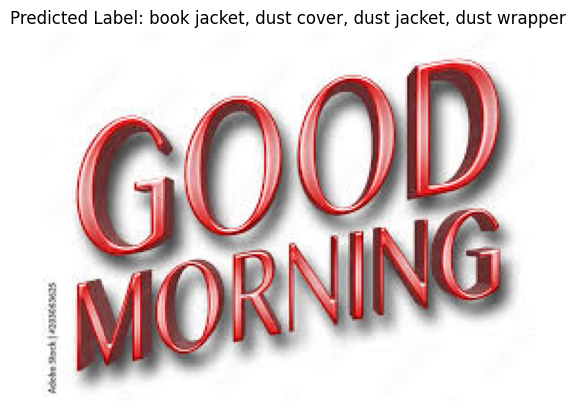

In [10]:
# Function to upload an image
def upload_image():
    uploaded = files.upload()
    for filename in uploaded.keys():
        image = Image.open(filename)
        return image

# Upload your own image
image = upload_image()

# Preprocess the image
inputs = feature_extractor(images=image, return_tensors="pt")

# Run inference
with torch.no_grad():
    outputs = model(**inputs)

# Get the predicted label
logits = outputs.logits
predicted_label = logits.argmax(-1).item()

# Get the labels from the model config
labels = model.config.id2label

# Display the image and the predicted label
plt.imshow(image)
plt.title(f"Predicted Label: {labels[predicted_label]}")
plt.axis("off")
plt.show()
